# Aim: Exploring Medical Cost Personal Dataset

The task is to predict cost based on several features.


## Columns

### Features:
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

### Label:

charges: Individual medical costs billed by health insurance

## Step-1: Importing Libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# importing the dataset
dataset=pd.read_csv('insurance.csv')

Let us have a quick look at the data.

In [3]:
## Seeing the top 5 rows
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
## seeing the last 5 rows
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
## checking the shape of dataset
dataset.shape

(1338, 7)

In [6]:
## checking the size of the dataset
dataset.size

9366

In [7]:
## let us get some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So, our dataset is not having null values so we need not to worry about Nan Values.

In [8]:
dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

As can see that we have the data belonging to different regions i.e. South-East, North-West, South-West, North-East in equal proportion.So we need not to perform any Stratified Sampling because we already have data which is taken in equal proportion from different regions.

In [9]:
## Now let us find collect statistical insights about the data
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



So, we can all understand mean, min, max, count, so let us find what is the meaning of 25%, 50% and 75%.

The 25%, 50% and 75% rows show the corresponding percentile: A percentile indicates the value below which a given percentage of observations in a group of observations falls.

So, 25% age basically means that out of the total population, 25% of the people's age lies below 27.

In [10]:
(dataset[dataset['age']<=27]['age'].value_counts().sum()) / (dataset['age'].value_counts().sum())

0.2705530642750374

In [11]:
(dataset[dataset['age']<=39]['age'].value_counts().sum()) / (dataset['age'].value_counts().sum())

0.5037369207772795

In [12]:
(dataset[dataset['age']<=51]['age'].value_counts().sum()) / (dataset['age'].value_counts().sum())

0.7556053811659192

## Visualizing The Data:

Visualizing the data to gain insights about the data.


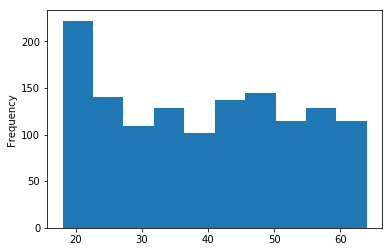

In [13]:
dataset.age.plot(kind='hist')

So, we can see that in our data we have maximum people whose age is 20.

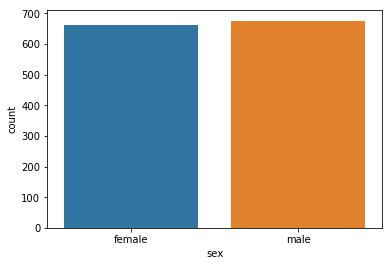

In [14]:
sns.countplot(x='sex',data=dataset)

From the above graph we can find that we have equal number of male and females in our sample population.

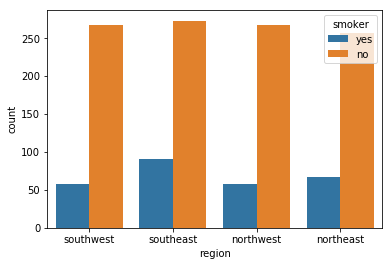

In [15]:
sns.countplot(x='region',hue='smoker',data=dataset)

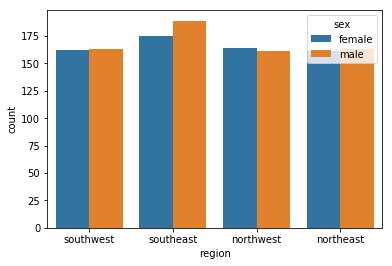

In [16]:
sns.countplot(x='region',hue='sex',data=dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232D9EDFA48>,
      dtype=object)

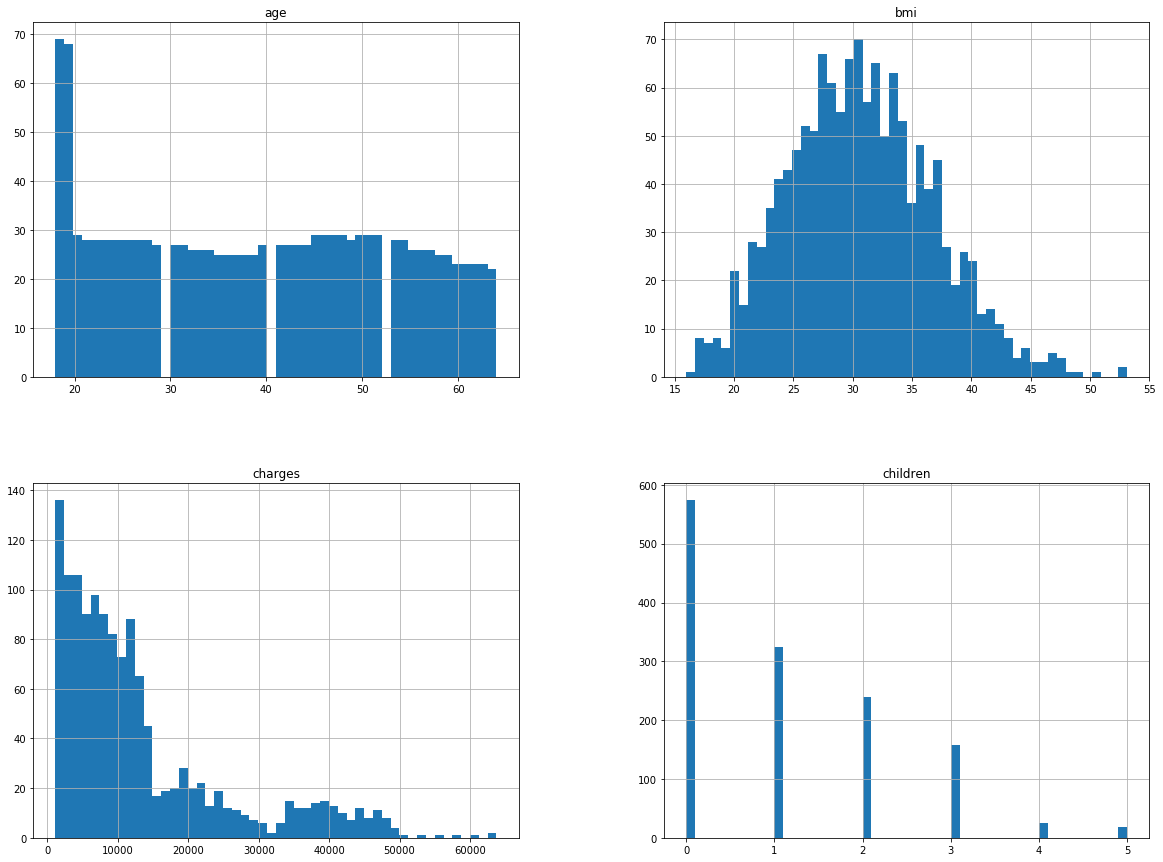

In [17]:
dataset.hist(bins=50,figsize=(20,15))

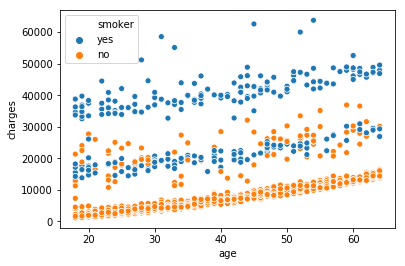

In [18]:
sns.scatterplot(x='age',y='charges',data=dataset,hue='smoker')

From the above graph we can see that smoker's pay more for the insurance charges in comparision to the people who donot smoke.

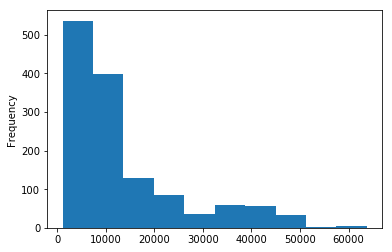

In [19]:
dataset['charges'].plot(kind='hist')

From the above graph we can see that about 50% of the total population has charges i.e. Individual medical costs billed by health insurance below 10000

574

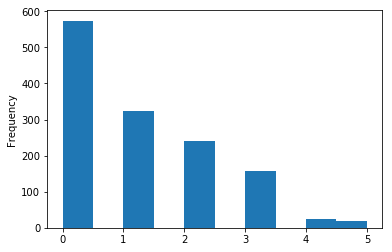

In [20]:
dataset.children.plot(kind='hist')
dataset[dataset['children']==0]['children'].count()

From the above graph we can see that out of the total population about 574 people have no children covered by health insurance.

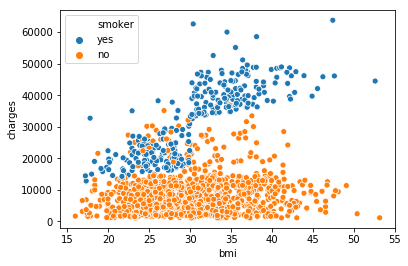

In [21]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=dataset)

From the above graph we can see that smoker's pay more charges than people who donot smoke, no matter what is their BMI.

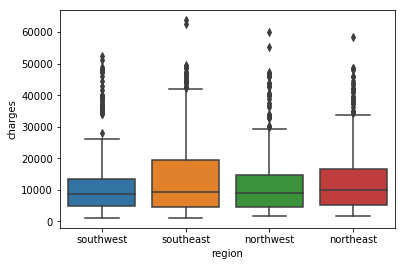

In [22]:
sns.boxplot(x='region',y='charges',data=dataset)

From the above graph we can see that people in south-east region pay more on Individual medical costs billed by health insurance, than the people in other regions.

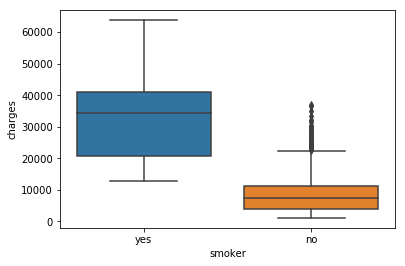

In [23]:
sns.boxplot(x='smoker',y='charges',data=dataset)

From the above graph it becomes crystal clear that people who smoke pay far more on Individual medical costs billed by health insurance, than the people who dont smoke. Also every person who smokes pay more than 10,000 for the charges.

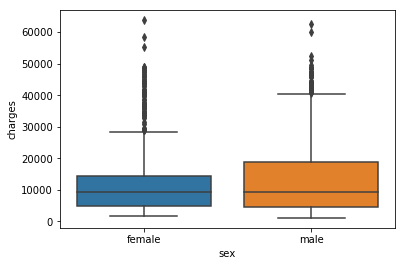

In [24]:
sns.boxplot(x='sex',y='charges',data=dataset)

In the above graph we can see how much money is spent by male and females on charges.

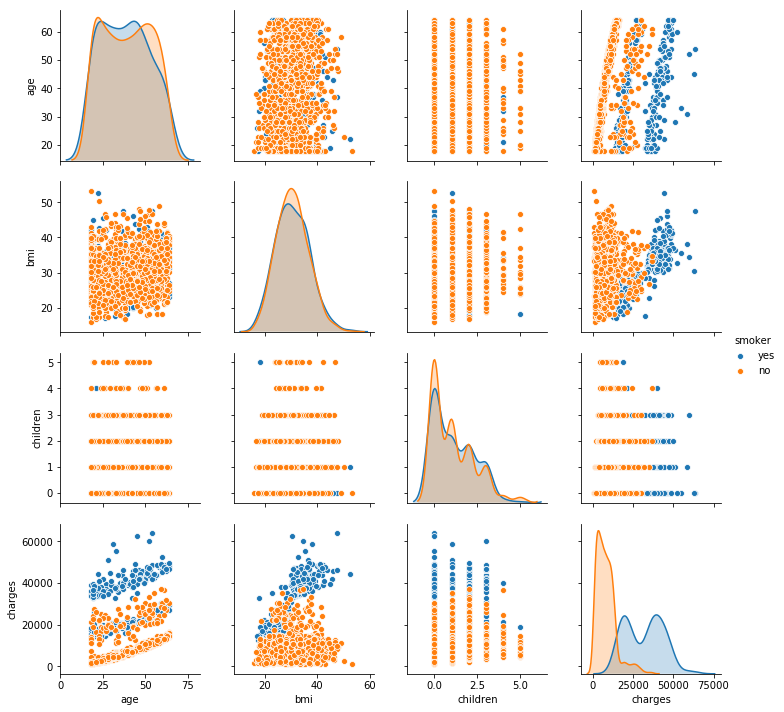

In [25]:
sns.pairplot(dataset,hue='smoker')

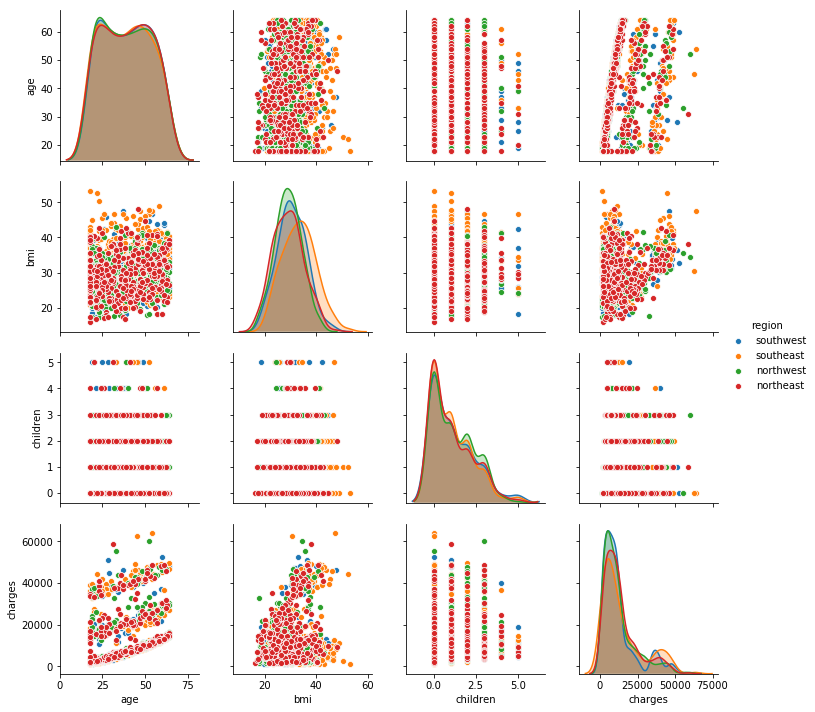

In [26]:
sns.pairplot(dataset,hue='region')

## Feature Encoding:


In [27]:
from sklearn.preprocessing import LabelEncoder
lbl_sex=LabelEncoder()
dataset['sex']=lbl_sex.fit_transform(dataset['sex'])
lbl_smoker=LabelEncoder()
dataset['smoker']=lbl_smoker.fit_transform(dataset['sex'])
lbl_region=LabelEncoder()
dataset['region']=lbl_region.fit_transform(dataset['region'])

In [28]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


In [29]:
np.unique(dataset['sex'])

array([0, 1])

In [30]:
np.unique(dataset['smoker'])

array([0, 1], dtype=int64)

In [31]:
np.unique(dataset['region'])

array([0, 1, 2, 3])

## Splitting the data into training and test data:

In [65]:
# dividing the data into features and label
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [66]:
## splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [67]:
x_train.head()

,age,sex,bmi,children,smoker,region
1075,32,0,29.59,1,0,2
131,61,0,22.04,0,0,0
15,19,1,24.60,1,1,3
1223,20,0,24.42,0,0,2
1137,26,0,22.23,0,0,1


In [68]:
x_test.head()

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,1,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,1,1
198,51,0,18.050,0,0,1


In [69]:
x_train.shape

(1003, 6)

In [70]:
x_test.shape

(335, 6)

In [71]:
y_test.head()

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

## Looking for Correlations:


In [72]:
corr_matrix=dataset.corr()

corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
smoker      0.057292
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

We can see that feature variable region is not much correlated to our target variable 'charges'.

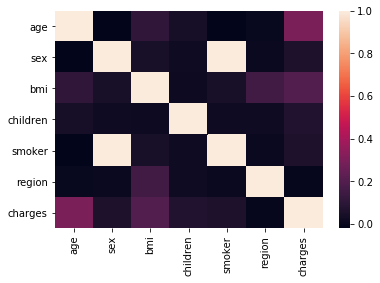

In [73]:
sns.heatmap(dataset.corr())

From the above heatmap we can see that feature variables 'smoker' and 'sex' are highly correlated, which means we can drop one column out of the two.